In [9]:
# To read dataset
import pandas as pd
# to plot
import matplotlib.pyplot as plt
# Use to standardize features by removing mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# PCA module
from sklearn.decomposition import PCA

In [10]:
# Load the dataset
data = pd.read_csv("Wine.csv")

# Display the first few rows of the dataset
print(data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [11]:
# Preprocess the data
# Separate the features and the target
X = data.drop('Customer_Segment', axis=1) # All features
y = data['Customer_Segment']    # Only customer segment

In [12]:

# Standardize the features
scaler = StandardScaler()   # standardize
X_scaled = scaler.fit_transform(X)  

In [13]:
# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Visualize the principal components
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

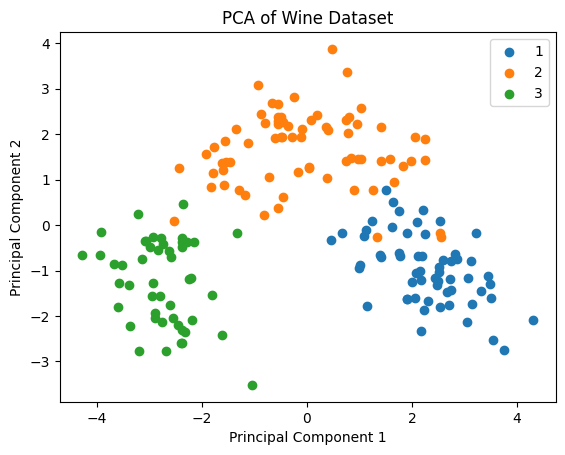

In [16]:
for target in pca_df['Target'].unique():
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], label=target)
    plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.show()